# Milutin Popovic

In [1]:
import numpy as np
import numdifftools as nd
from matplotlib import pyplot as plt
from time import time

# Exercise 25
Implement the gradient algorithm with Armijo step size rule (Algorithm 6.1 in the lec-
ture notes). Use as input data the starting vector $x_0$, the parameter for the stopping cri-
terion ε, and the parameters $σ$ and $β$ for the determination of the Armijo step size. The
sequence $x_0$, $x_1$, $x_2$, ... containing the iteration history should be returned and the points
$(x_0, f(x_0)), (x_1, f(x_1)), (x2_, f(x_2)), ...$ should be plotted on the graph of the function $f$.
The implemented algorithm should be tested for the following functions and input data values:

In [7]:
def gradient_method(f, x_0, eps, sig, beta):
    f_grad = nd.Gradient(f)
    x_k = x_0
    x_k_s = [np.array(x_k)]
    f_k_s = [f(x_k)]
    while True:
        d_k = -f_grad(x_k)
        if np.linalg.norm(d_k) <= eps:
            break
            
        # Find step size (Arnijno Rule)
        t_k = 1
        while f(x_k + t_k*d_k) > f(x_k) + sig*t_k * np.dot(f_grad(x_k), d_k):
            t_k = t_k * beta
            
        x_k = x_k + t_k * d_k
        x_k_s.append(x_k)
        f_k_s.append(f(x_k))
        
    return x_k_s, f_k_s

def sgd(
    a: np.ndarray,
    b: np.ndarray,
    x_0: float,
    step: float,
    sig: float,
    beta: float,
    batches: int
) -> (list[np.ndarray], list[np.ndarray]) :

    x_k: np.ndarray = x_0
    x_k_s: list[np.ndarray] = [np.array(x_k)]
    f_k_s: list[np.ndarray] = [f(x_k, a, b)]

    batch: int = 0
    count: int = 0
    dx: float = 1e-3
    while count < batches:
        i = np.random.randint(0, len(a))
        d_k = -( fi(x_k+dx, a[i], b[i]) - fi(x_k-dx, a[i],b[i]) ) / (2*dx)
        

        x_k = x_k + step * d_k
        x_k_s.append(x_k)
        f_k_s.append(f(x_k, a, b))

        batch +=1
        if batch == len(a): 
            count += 1
            batch = 0
            if batch % 10: print(f"Batch: {count}")

    return x_k_s, f_k_s

def gd(a: np.ndarray,
       b: np.ndarray,
       x_0: float,
       eps: float,
       sig: float,
       beta: float
) -> (list[np.ndarray], list[np.ndarray]):
    x_k = x_0
    x_k_s = [np.array(x_k)]
    f_k_s = [f(x_k, a, b)]
    dx = 1e-3
    while True:
        d_k = -sum(
            1/(2*dx) * (fi(x_k + dx, a_i, b_i) - fi(x_k - dx, a_i, b_i))
            for a_i, b_i in zip(a, b)
        )
        if np.linalg.norm(d_k) <= eps:
            break
            
        # Find step size (Arnijno Rule)
        t_k = 1
        while f(x_k + t_k*d_k, a, b) > f(x_k, a, b) + sig*t_k * np.dot(-d_k, d_k):
            t_k = t_k * beta
            
        x_k = x_k + t_k * d_k
        x_k_s.append(x_k)
        f_k_s.append(f(x_k, a, b))
        
    return x_k_s, f_k_s

In [8]:
def fi(x, a_i, b_i):
    return 1/2*(a_i*x-b_i)**2

def f(x, a, b):
    return sum(fi(x, a_i, b_i) for a_i, b_i in zip(a, b))

In [13]:
a: np.ndarray = np.random.rand(10000)
b: np.ndarray = np.random.rand(10000)
x_0: float = 8.0
sig: float = 10e-2
beta: float = 1/2
step: float = 0.01;
batches: int = 1
eps: float = 1e-4

start_gd = time()
gd_x_s, gd_f_s = gd(a, b, x_0, eps, sig, beta)
end_gd = time()
print(f"GD time: {end_gd-start_gd} solution f={gd_f_s[-1]}  x={gd_x_s[-1]} steps={len(gd_x_s)}")

start_sgd = time()
sgd_x_s, sgd_f_s = sgd(a, b, x_0, step, sig, beta, batches)
end_sgd = time()
print(f"SGD time: {end_sgd-start_sgd} solution: f={sgd_f_s[-1]} x={sgd_x_s[-1]}, steps={len(sgd_x_s)}")

GD time: 5.241256237030029 solution f=724.5575474470213  x=0.7524298491826923 steps=42
SGD time: 46.92195749282837 solution: f=724.5969941867688 x=0.757302266459075, steps=10001


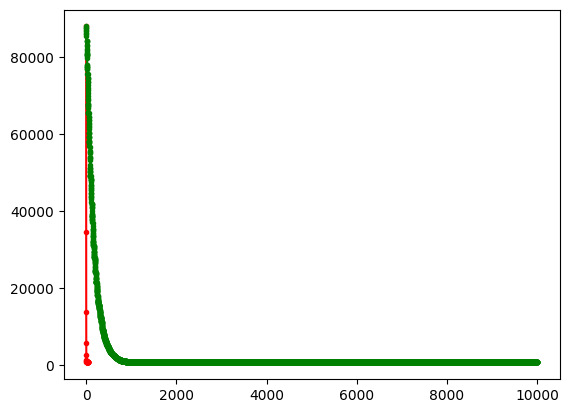

In [21]:
plt.plot(gd_f_s, c='r', marker='.')
plt.plot(sgd_f_s, c='g', marker='.')

92.93535542501762

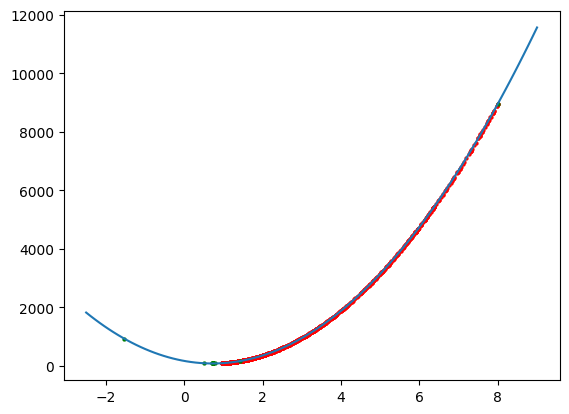

In [159]:
x = np.linspace(-2.5, 9, 100)
y = f(x, a, b)

plt.plot(x, y)
plt.scatter(sgd_x_s, sgd_f_s, c='r', marker='.', linewidth=0.1)
plt.scatter(gd_x_s, gd_f_s, c='g', marker='.', linewidth=0.1)

Text(0.5, 1.0, '$cos(x)$')

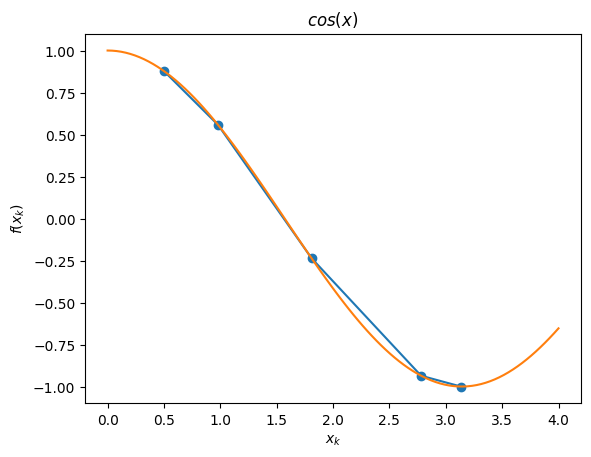

In [55]:
f_a = lambda x: np.cos(x)
x_0_a = 0.5; eps_a = 10e-3; sig_a = 10e-2; beta_a = 1/2
xa_k_s, fa_k_s = gradient_method(f_a, x_0_a, eps_a, sig_a, beta_a)

x=np.linspace(0, 4, 100)

plt.plot(xa_k_s, fa_k_s, marker='o')
plt.plot(x, np.cos(x))
plt.xlabel(r'$x_k$')
plt.ylabel(r'$f(x_k)$')
plt.title(r'$cos(x)$')

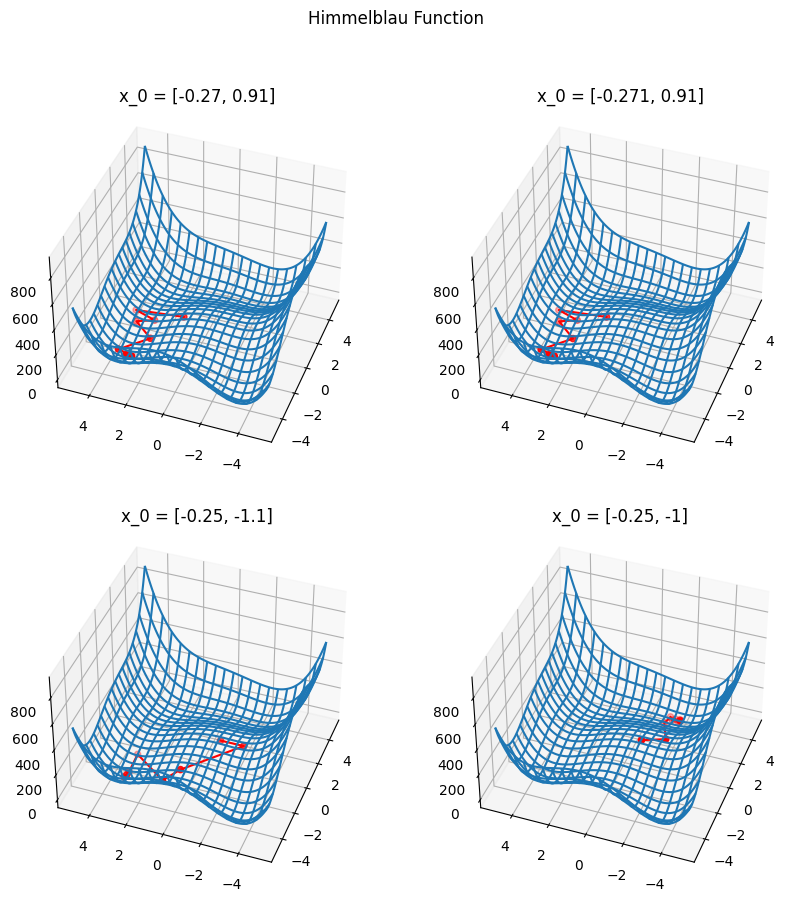

In [4]:
f_b = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
eps_b = 10e-1; sig_b = 10e-2; beta_b = 1/2
x_0_b = [[-0.27, 0.91], [-0.271, 0.91], [-0.25, -1.1], [-0.25, -1]]

x1 = np.linspace(-5, 5, 200)
x2 = np.linspace(-5, 5, 200)
X1, X2 = np.meshgrid(x1, x2)
fb = f_b([X1, X2])

fig = plt.figure(figsize=[10,10])
fig.suptitle('Himmelblau Function')
for i, x_0 in enumerate(x_0_b):
    x_k_s, f_k_s= gradient_method(f_b, x_0, eps_b, sig_b, beta_b)
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot_wireframe(X1, X2, fb, cstride=10, rstride=10)
    ax.scatter(np.array(x_k_s)[:,0], np.array(x_k_s)[:,1], f_k_s, c='red', marker='o')
    ax.plot(np.array(x_k_s)[:,0], np.array(x_k_s)[:,1], f_k_s, c='red')
    ax.view_init(40, 200)
    ax.set_title(f'x_0 = {x_0}')

Text(0.5, 0.92, '$x_0 = (1,2)^T$')

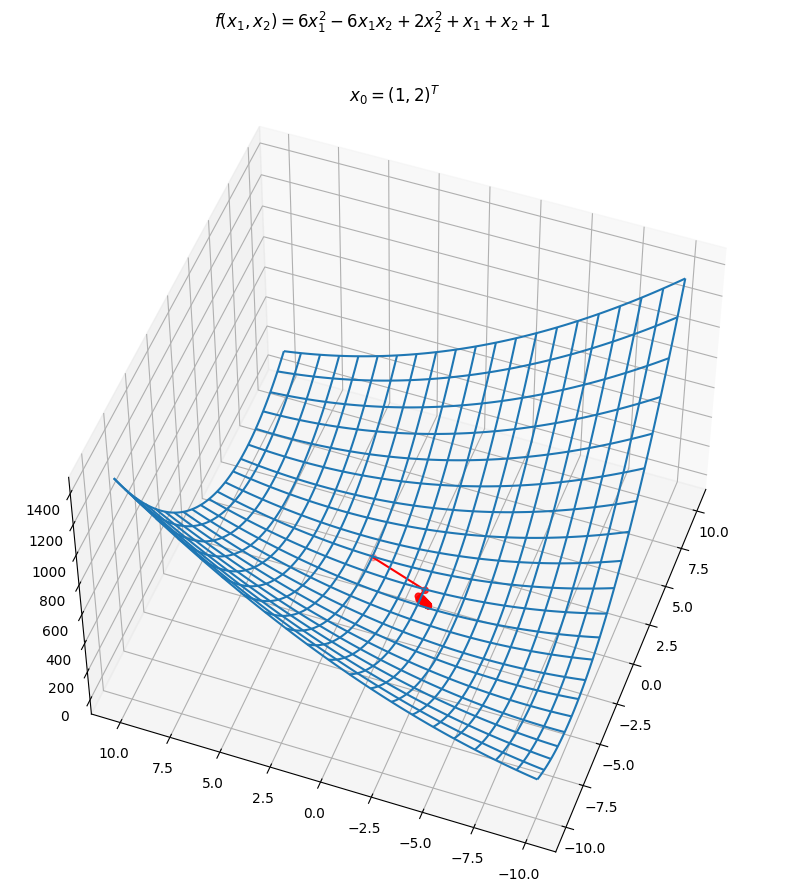

In [5]:
f_c = lambda x: 6*x[0]**2 - 6*x[0]*x[1] + 2*x[1]**2 + x[0] + x[1] + 1
x_c_0 = [1,2]; eps_c = 10e-2; sig_c = 10e-2; beta_c = 0.5

xc_k_s, fc_k_s= gradient_method(f_c, x_c_0, eps_c, sig_c, beta_c)

x1 = np.linspace(-10, 10, 200)
x2 = np.linspace(-10, 10, 200)
X1, X2 = np.meshgrid(x1, x2)
fc = f_c([X1, X2])

fig = plt.figure(figsize=[10,10])
fig.suptitle(r'$f(x_1, x_2) = 6x_1^2 - 6x_1x_2 + 2x_2^2 + x_1 + x_2 + 1$')
# Plot the surface
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, fc, cstride=10, rstride=10)
ax.scatter(np.array(xc_k_s)[:,0], np.array(xc_k_s)[:,1], fc_k_s, c='red', marker='o')
ax.plot(np.array(xc_k_s)[:,0], np.array(xc_k_s)[:,1], fc_k_s, c='red')
ax.view_init(50, 200)
ax.set_title(r'$x_0 = (1,2)^T$')

# Exercise 26
The gradient algorithm with Armijo step size rule should be employed for the minimization
of the Rosenbrock function
$f(x1, x2) = (1 − x_1)^2 + 100(x_2 − x_1^2)^2$,
with $x_0=(−1.2, 1)^T$ , $σ=10^{−4}$ and $β=0.5$.
How many iterations are needed to fulfill the stopping criterion
$∥∇f(xk)∥ ≤ ε$,
when ε takes the values $10^{−1}, ..., 10{−5}$? Provide a graphical representation of the implemen-
tation history. Provide the vector xSTOP at which the algorithm stops and the value of the
distance from xSTOP to the global minimum $x∗ = (1, 1)^T$ of $f$.

In [6]:
f_rosen = lambda x: (1-x[0])**2 + 100*(x[1]-x[0]**2)**2
x_0 = [-1.2, 1]; sig = 10e-4; beta=0.5
eps_s = [10**(-i) for i in range(1, 6)]
ks = []; x_stop_to_min = []
for eps in eps_s:
    x_k_s, f_k_s= gradient_method(f_rosen, x_0, eps, sig, beta)
    ks.append(len(x_k_s))
    x_stop_to_min.append(np.linalg.norm(x_k_s[-1] - np.array([1, 1])))

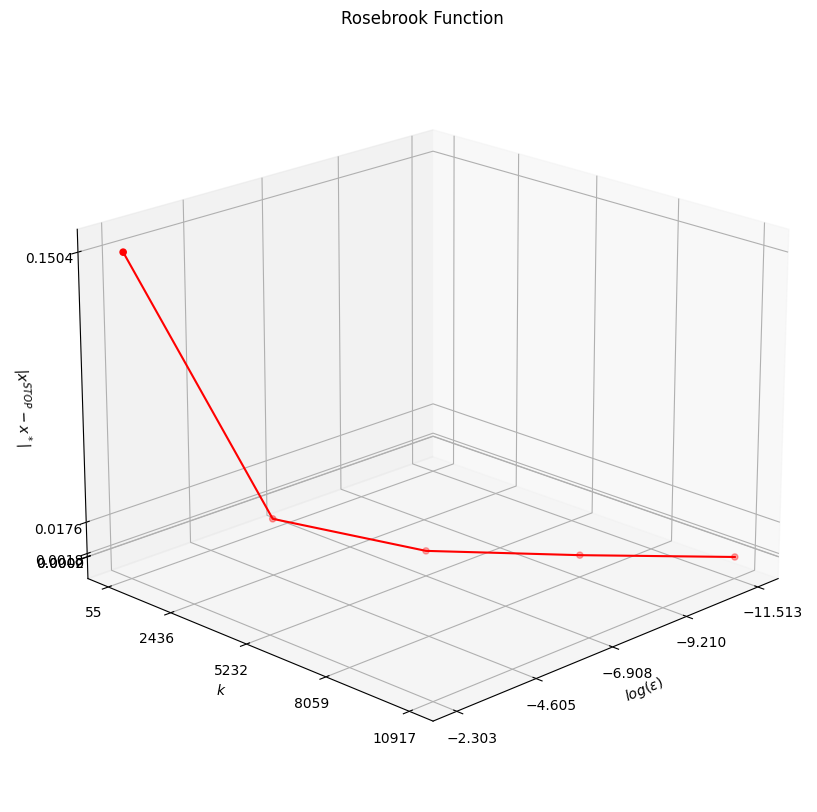

In [7]:
fig = plt.figure(figsize=[10,10])
# Plot the surface
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log(eps_s),  ks, x_stop_to_min ,c='red', marker='o')
ax.plot(np.log(eps_s),  ks, x_stop_to_min ,c='red')

ax.set_title('Rosebrook Function')
ax.set_xticks(np.log(eps_s))
ax.set_yticks(ks)
ax.set_zticks(x_stop_to_min)
ax.set_xlabel(r'$log(\varepsilon)$')
ax.set_ylabel(r'$k$')
ax.set_zlabel(r'$\|x^{STOP} - x^*\|$')
ax.view_init(20, 45)